# Exploratory Data Analysis

In [7]:
# !pip install matplotlib

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from bokeh.plotting import figure, show, output_file
from bokeh.models import ColumnDataSource
# from bokeh.io import output_notebook
# output_notebook()

In [6]:
def plot_df(inc_df):
    ax = inc_df.plot(x='time', y='kWh', kind='line')

    # Use a MultipleLocator tick locator
    ax.xaxis.set_major_locator(MultipleLocator(10000))  # Set tick frequency to every other x value

    # Adjust the tick label rotation
    plt.xticks(rotation=45)  # Rotate the tick labels by 45 degrees

    # Display the plot
    plt.show()

def plot_timeseries(axes, x, y, color, xlabel, ylabel):
  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)
  # Set the x-axis label
  axes.set_xlabel(xlabel)
  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)
  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)
  
def plot_timeseries(axes, x, y, labels):
    # Create a dictionary that maps each unique label to a specific color
    label_colors = {'unclassified': 'gray', 'Production': 'green', 'Power-down': 'orange', 'Non-production': 'red', 'Power-up': 'blue'}
    # Get a list of unique labels in the 'labels' column
    unique_labels = np.unique(labels)
    # Plot each data point separately with the appropriate color
    for label in unique_labels:
        mask = labels == label
        color = label_colors[label]
        axes.plot(x[mask], y[mask], color=color, label=label)
    # Set the x-axis label
    axes.set_xlabel('X Label')
    # Set the y-axis label
    axes.set_ylabel('Y Label')
    # Set the legend
    axes.legend()



In [8]:
df = pd.read_csv('../data_new/train_data_v3.csv')

In [9]:
df.head()

,time,Measure,kWh,label
0,2022-01-03 00:00:00,Mech_Svc_AHU,8.00,unclassified
1,2022-01-03 00:00:00,Sub - Main M2,1000.00,unclassified
2,2022-01-03 00:00:00,FB1 - Main 1L,26.50,unclassified
3,2022-01-03 00:00:00,AB3 - Main 3L,36.75,Non-production
4,2022-01-03 00:00:00,Sub - Feeder F04,0.00,unclassified


In [12]:
fac_parts = df['Measure'].unique()
fac_parts

array(['Mech_Svc_AHU', 'Sub - Main M2', 'FB1 - Main 1L', 'AB3 - Main 3L',
       'Sub - Feeder F04', 'Sub - Feeder F02', 'Sub - Feeder F03',
       'MSB1 - Main 1L', 'BS4 - Main 4R', 'Sub - Feeder F08',
       'AB2 - Main 2R', 'Paint_AHU', 'BS1 - Main 1L', 'AB3 - Main 3R',
       'BS3 - Main 3L', 'BS2 - Main 2L', 'Sub - Feeder F10',
       'FB3 - Main 3L', 'AB1 - Main 1L', 'Sub - Feeder F01',
       'BS3 - Main 3R', 'BS4 - Main 4L', 'BS2 - Main 2R'], dtype=object)

In [13]:
dfs = []
for val in fac_parts:
    dfs.append(df.loc[df['Measure'] == val])

In [14]:
# get an overview of the df sizes
for cur_df in dfs:
    print(cur_df.shape)

(30240, 4)
(30240, 4)
(30240, 4)
(22848, 4)
(30240, 4)
(30240, 4)
(30240, 4)
(30240, 4)
(30240, 4)
(30240, 4)
(30240, 4)
(30240, 4)
(20160, 4)
(30240, 4)
(20160, 4)
(30240, 4)
(30240, 4)
(30240, 4)
(30240, 4)
(30240, 4)
(20160, 4)
(30240, 4)
(24776, 4)


In [16]:
# filter for actually labeled factory parts
filtered_dfs = []

for cur_df in dfs:
    if len(cur_df['label'].unique()) > 1:
        filtered_dfs.append(cur_df)

### Analyzing one labeled df

In [119]:
example_df = filtered_dfs[1].copy()

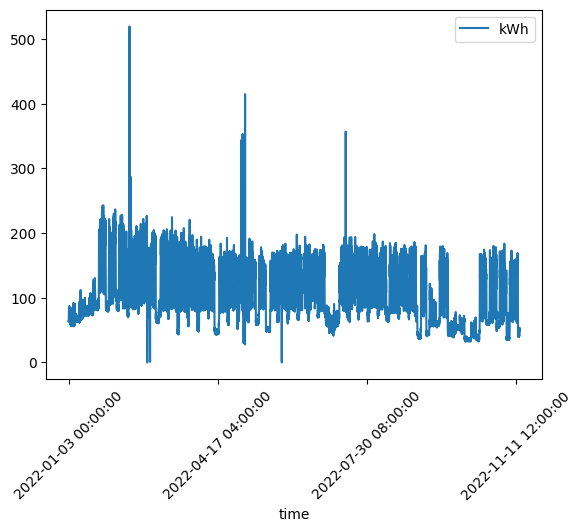

In [120]:
plot_df(example_df)

In [121]:
print(example_df['label'].value_counts())
print(example_df.describe())
print(example_df.info())
print(example_df.isna().sum())

label
Non-production    11143
Production         9100
unclassified       4032
Power-down         3544
Power-up           2421
Name: count, dtype: int64
                kWh
count  30240.000000
mean     108.715555
std       44.830149
min        0.000000
25%       71.484375
50%      100.687500
75%      147.312500
max      519.750000
<class 'pandas.core.frame.DataFrame'>
Index: 30240 entries, 5 to 652409
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     30240 non-null  object 
 1   Measure  30240 non-null  object 
 2   kWh      30240 non-null  float64
 3   label    30240 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB
None
time       0
Measure    0
kWh        0
label      0
dtype: int64


In [122]:
list(example_df.head())

['time', 'Measure', 'kWh', 'label']

In [123]:
example_df['time'] = pd.to_datetime(example_df['time'])

In [124]:
example_df = example_df.set_index('time')

In [125]:
example_df.head(100)

,Measure,kWh,label
time,,,
2022-01-03 00:00:00,Sub - Feeder F02,64.2500,Non-production
2022-01-03 00:15:00,Sub - Feeder F02,64.3125,Non-production
2022-01-03 00:30:00,Sub - Feeder F02,64.3750,Non-production
2022-01-03 00:45:00,Sub - Feeder F02,64.4375,Non-production
2022-01-03 01:00:00,Sub - Feeder F02,64.5000,Non-production
...,...,...,...
2022-01-03 23:45:00,Sub - Feeder F02,64.6250,Non-production
2022-01-04 00:00:00,Sub - Feeder F02,66.0000,Non-production
2022-01-04 00:15:00,Sub - Feeder F02,64.3125,Non-production


In [126]:
example_df = example_df.resample('1H').first()

In [127]:
example_df.head(100)

,Measure,kWh,label
time,,,
2022-01-03 00:00:00,Sub - Feeder F02,64.25,Non-production
2022-01-03 01:00:00,Sub - Feeder F02,64.50,Non-production
2022-01-03 02:00:00,Sub - Feeder F02,63.50,Non-production
2022-01-03 03:00:00,Sub - Feeder F02,70.75,Non-production
2022-01-03 04:00:00,Sub - Feeder F02,68.00,Non-production
...,...,...,...
2022-01-06 23:00:00,Sub - Feeder F02,57.00,Non-production
2022-01-07 00:00:00,Sub - Feeder F02,57.50,Non-production
2022-01-07 01:00:00,Sub - Feeder F02,63.50,Non-production


In [128]:
# drop outliers
threshold_up = example_df['kWh'].quantile(0.95)
threshold_down = example_df['kWh'].quantile(0.05)
example_df = example_df[(example_df['kWh'] < threshold_up) & (example_df['kWh'] > threshold_down)]

In [129]:
# source=ColumnDataSource(example_df)
# output_file("plot_after.html")

In [130]:
# p=figure(title='kWh over time', x_axis_label='Time', y_axis_label='kWh')
# p.line(example_df.index, example_df['kWh'], line_width=2)
# show(p)

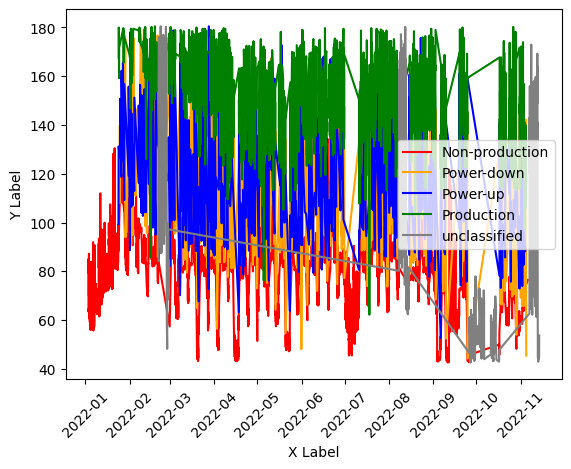

In [131]:
fig, ax = plt.subplots()
# Plot the CO2 levels time-series in blue
plot_timeseries(ax, example_df.index, example_df["kWh"], labels=example_df['label'])
plt.xticks(rotation=45)
plt.show()

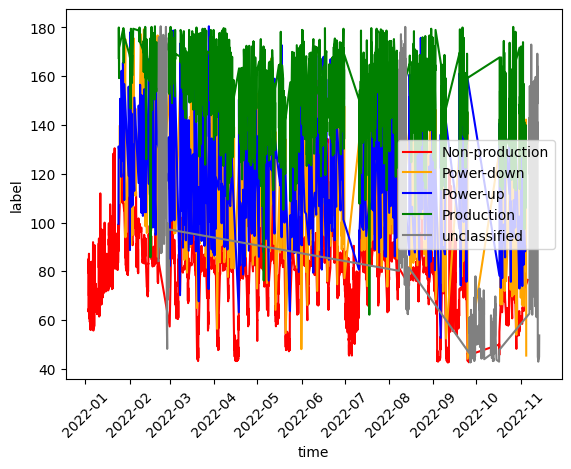

In [132]:
fig, ax = plt.subplots()
label_colors = {'unclassified': 'gray', 'Production': 'green', 'Power-down': 'orange', 'Non-production': 'red', 'Power-up': 'blue'}
grouped = example_df.groupby('label')
# Loop over each group, plot the data with the appropriate color, and set the label
for label, group in grouped:
    color = label_colors[label]
    ax.plot(group.index, group['kWh'], color=color, label=label)
# Set the x-axis label
ax.set_xlabel(example_df.index.name)
# Set the y-axis label
ax.set_ylabel('label')
plt.xticks(rotation=45)
# Set the legend
ax.legend()
plt.show()

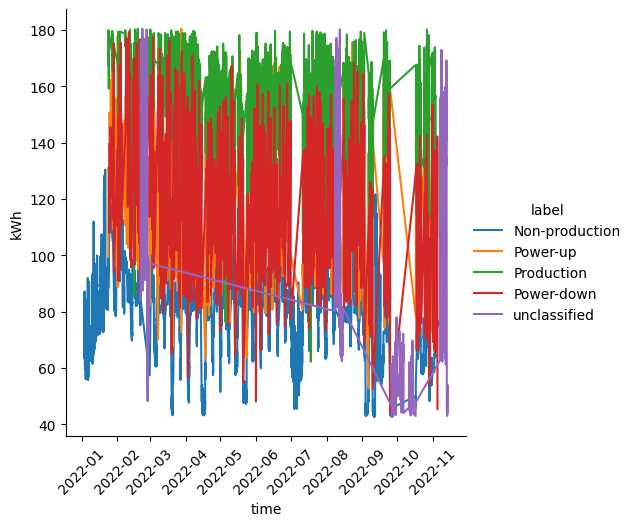

In [133]:
g = sns.relplot(x=example_df.index, y='kWh', data=example_df, kind='line', hue='label')
plt.xticks(rotation=45)
plt.show()

In [134]:
example_df.head()

,Measure,kWh,label
time,,,
2022-01-03 00:00:00,Sub - Feeder F02,64.25,Non-production
2022-01-03 01:00:00,Sub - Feeder F02,64.50,Non-production
2022-01-03 02:00:00,Sub - Feeder F02,63.50,Non-production
2022-01-03 03:00:00,Sub - Feeder F02,70.75,Non-production
2022-01-03 04:00:00,Sub - Feeder F02,68.00,Non-production


In [135]:
example_df['Measure'].unique()

array(['Sub - Feeder F02'], dtype=object)

In [118]:
# example_df.to_csv('BS1_-_Main_1L.csv')

# Solution

In [42]:
holdout = pd.read_csv('../data/holdout.csv')

In [43]:
holdout.head(100)

,time,Measure,kWh,label
0,2020-07-27 00:00:00,Sub - Feeder F08,481.5000,Non-production
1,2020-07-27 00:15:00,Sub - Feeder F08,481.3750,Non-production
2,2020-07-27 00:30:00,Sub - Feeder F08,481.2500,Non-production
3,2020-07-27 00:45:00,Sub - Feeder F08,481.1250,Non-production
4,2020-07-27 01:00:00,Sub - Feeder F08,481.0000,Non-production
...,...,...,...,...
95,2020-07-28 10:00:00,Sub - Feeder F08,748.0000,Production
96,2020-07-28 10:15:00,Sub - Feeder F08,774.8125,Production
97,2020-07-28 10:30:00,Sub - Feeder F08,801.6250,Production
98,2020-07-28 10:45:00,Sub - Feeder F08,828.4375,Production


In [44]:
holdout['label'].unique()

array(['Non-production', 'Production', 'Power-up', 'Power-down'],
      dtype=object)

In [45]:
holdout['time'] = pd.to_datetime(holdout['time'])
holdout = holdout.set_index('time')
holdout = holdout.resample('1H').first()

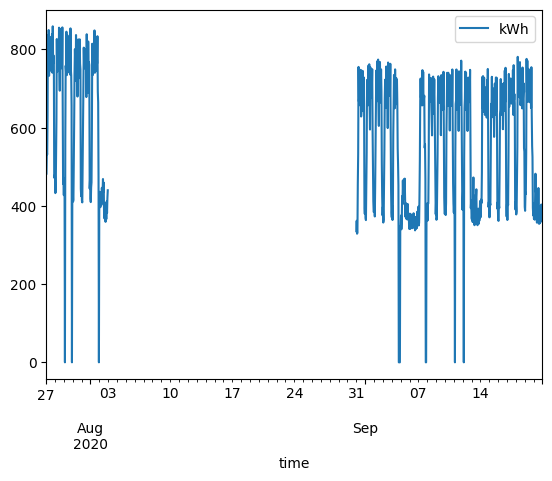

In [46]:
holdout.plot.line(y='kWh')
plt.show()

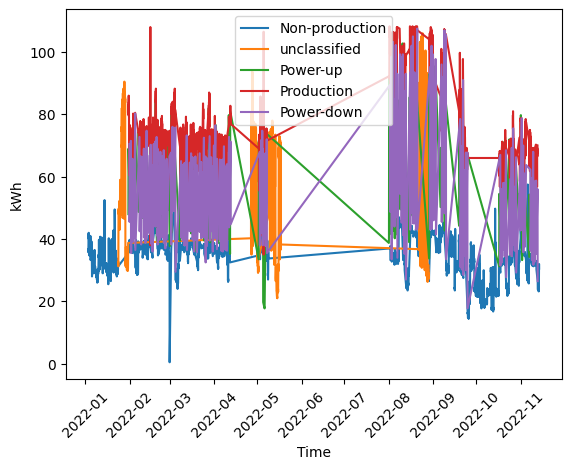

In [47]:
unique_labels = example_df['label'].unique()

# Create a plot with a different color for each label
fig, ax = plt.subplots()
for label in unique_labels:
    # Get the subset of the dataframe for this label
    subset = example_df[example_df['label'] == label]
    # Plot the data for this label with a different color
    ax.plot(subset.index, subset['kWh'], label=label)
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('kWh')
plt.xticks(rotation=45)
plt.show()

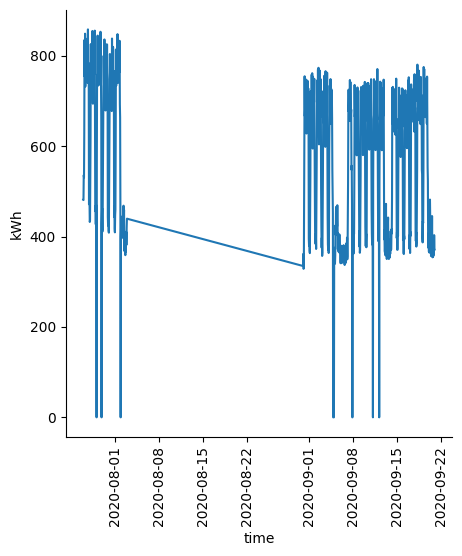

In [49]:
# x=holdout.index
g = sns.relplot(x='time', y='kWh', data=holdout, kind='line')
plt.xticks(rotation=90)
plt.show()

# Automated Preprocessing

In [1]:
# imports
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-05-07 06:05:42.640388: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-07 06:05:45.947624: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('../data_new/train_data_v3.csv')

In [3]:
df.head()

,time,Measure,kWh,label
0,2022-01-03 00:00:00,Mech_Svc_AHU,8.00,unclassified
1,2022-01-03 00:00:00,Sub - Main M2,1000.00,unclassified
2,2022-01-03 00:00:00,FB1 - Main 1L,26.50,unclassified
3,2022-01-03 00:00:00,AB3 - Main 3L,36.75,Non-production
4,2022-01-03 00:00:00,Sub - Feeder F04,0.00,unclassified


In [4]:
fac_loc_list = df['Measure'].unique()
print(fac_loc_list)

['Mech_Svc_AHU' 'Sub - Main M2' 'FB1 - Main 1L' 'AB3 - Main 3L'
 'Sub - Feeder F04' 'Sub - Feeder F02' 'Sub - Feeder F03' 'MSB1 - Main 1L'
 'BS4 - Main 4R' 'Sub - Feeder F08' 'AB2 - Main 2R' 'Paint_AHU'
 'BS1 - Main 1L' 'AB3 - Main 3R' 'BS3 - Main 3L' 'BS2 - Main 2L'
 'Sub - Feeder F10' 'FB3 - Main 3L' 'AB1 - Main 1L' 'Sub - Feeder F01'
 'BS3 - Main 3R' 'BS4 - Main 4L' 'BS2 - Main 2R']


In [5]:
# create supervised and unsupervised datasets

for fac_loc in fac_loc_list:
    cur_df = df[df['Measure'] == fac_loc]
    print(fac_loc)
    print(cur_df.shape)

    # downsample data to every hour
    cur_df.loc[:, 'time'] = pd.to_datetime(cur_df['time'])
    cur_df = cur_df.set_index('time')
    cur_df = cur_df.resample('1H').first()
    print(cur_df.shape)
    # drop outliers
    threshold_up = cur_df['kWh'].quantile(0.95)
    threshold_down = cur_df['kWh'].quantile(0.10)
    cur_df = cur_df.loc[(cur_df['kWh'] < threshold_up) & (cur_df['kWh'] > threshold_down)]

    # write into corresponding folder
    print(cur_df.shape)
    # add all data to unsupervised folder
    cur_df.to_csv('../data_new/unsupervised/' + fac_loc + '.csv')
    
    if len(cur_df['label'].unique()) > 1:
        
        # add labeled data to supervised folder
        cur_df.to_csv('../data_new/supervised/' + fac_loc + '.csv')
        
        print(cur_df.shape)
        # add only labeled data to supervised-dropped folder 
        cur_df = cur_df.loc[cur_df['label'] != 'unclassified']
        cur_df.to_csv('../data_new/supervised-dropped/' + fac_loc + '.csv')
        print(cur_df.shape)
    print(cur_df.shape)

Mech_Svc_AHU
(30240, 4)
(7560, 3)
(6279, 3)
(6279, 3)
Sub - Main M2
(30240, 4)
(7560, 3)
(5345, 3)
(5345, 3)
FB1 - Main 1L
(30240, 4)
(7560, 3)
(5833, 3)
(5833, 3)
AB3 - Main 3L
(22848, 4)
(7560, 3)
(4846, 3)
(4846, 3)
(4219, 3)
(4219, 3)
Sub - Feeder F04
(30240, 4)
(7560, 3)
(3580, 3)
(3580, 3)
Sub - Feeder F02
(30240, 4)
(7560, 3)
(6423, 3)
(6423, 3)
(5843, 3)
(5843, 3)
Sub - Feeder F03
(30240, 4)
(7560, 3)
(6359, 3)
(6359, 3)
MSB1 - Main 1L
(30240, 4)
(7560, 3)
(5031, 3)
(5031, 3)
BS4 - Main 4R
(30240, 4)
(7560, 3)
(6391, 3)
(6391, 3)
(4984, 3)
(4984, 3)
Sub - Feeder F08
(30240, 4)
(7560, 3)
(6423, 3)
(6423, 3)
AB2 - Main 2R
(30240, 4)
(7560, 3)
(6423, 3)
(6423, 3)
Paint_AHU
(30240, 4)
(7560, 3)
(6328, 3)
(6328, 3)
BS1 - Main 1L
(20160, 4)
(7560, 3)
(4284, 3)
(4284, 3)
(2829, 3)
(2829, 3)
AB3 - Main 3R
(30240, 4)
(7560, 3)
(6414, 3)
(6414, 3)
BS3 - Main 3L
(20160, 4)
(7560, 3)
(2955, 3)
(2955, 3)
BS2 - Main 2L
(30240, 4)
(7560, 3)
(6402, 3)
(6402, 3)
Sub - Feeder F10
(30240, 4)
(756

In [145]:
for fac_loc in fac_loc_list:
    cur_df = df[df['Measure'] == fac_loc]
    print(fac_loc)
    print(cur_df.shape)
    print(cur_df['label'].value_counts())

Mech_Svc_AHU
(30240, 4)
label
unclassified    30240
Name: count, dtype: int64
Sub - Main M2
(30240, 4)
label
unclassified    30240
Name: count, dtype: int64
FB1 - Main 1L
(30240, 4)
label
unclassified    30240
Name: count, dtype: int64
AB3 - Main 3L
(22848, 4)
label
Non-production    9540
Production        6577
unclassified      3360
Power-up          1722
Power-down        1649
Name: count, dtype: int64
Sub - Feeder F04
(30240, 4)
label
unclassified    30240
Name: count, dtype: int64
Sub - Feeder F02
(30240, 4)
label
Non-production    11143
Production         9100
unclassified       4032
Power-down         3544
Power-up           2421
Name: count, dtype: int64
Sub - Feeder F03
(30240, 4)
label
unclassified    30240
Name: count, dtype: int64
MSB1 - Main 1L
(30240, 4)
label
unclassified    30240
Name: count, dtype: int64
BS4 - Main 4R
(30240, 4)
label
Production        9634
Non-production    8811
unclassified      7392
Power-up          2280
Power-down        2123
Name: count, dtype: in